In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import math

In [2]:
# define a range x 
x = np.linspace(-3, 3) 
x

array([-3.        , -2.87755102, -2.75510204, -2.63265306, -2.51020408,
       -2.3877551 , -2.26530612, -2.14285714, -2.02040816, -1.89795918,
       -1.7755102 , -1.65306122, -1.53061224, -1.40816327, -1.28571429,
       -1.16326531, -1.04081633, -0.91836735, -0.79591837, -0.67346939,
       -0.55102041, -0.42857143, -0.30612245, -0.18367347, -0.06122449,
        0.06122449,  0.18367347,  0.30612245,  0.42857143,  0.55102041,
        0.67346939,  0.79591837,  0.91836735,  1.04081633,  1.16326531,
        1.28571429,  1.40816327,  1.53061224,  1.65306122,  1.7755102 ,
        1.89795918,  2.02040816,  2.14285714,  2.26530612,  2.3877551 ,
        2.51020408,  2.63265306,  2.75510204,  2.87755102,  3.        ])

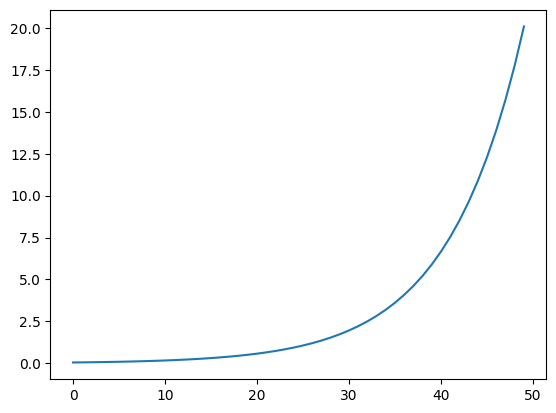

In [3]:
# plot the original function f(x)
f_x = np.exp(x) 
plt.plot(f_x)

In [9]:
def numerical_derivative(func: callable, x: np.ndarray, h: float=1e-5, degree_current=1, degree_target=1): 
    """ 
    Numerical Derivative up to n_degrees 

    h = represents x -> 0 
    A small step size for the finite difference method (default: 1e-5).
    """
    if degree_current >= degree_target: 
        y_prime = (func(x + h) - (func(x))) / (h)
        return y_prime 
    return numerical_derivative(func, x, h, degree_current+1, degree_target)


In [10]:

f_prime_x = numerical_derivative(np.exp, x)
f_prime_2_x = numerical_derivative(np.exp, x, degree_target=2) 
 


In [11]:
# n-th degree derivative at a = 0 (x(0)) (f_n_a)
n = 10 
f_prime_10 = numerical_derivative(np.exp, x=0, degree_target=10) 
f_prime_10

1.000005000006965

In [18]:
def taylor_series(func: callable, x: np.ndarray, a: int, terms: int):
    """ 
    Generates taylor series based on the general form
    """
    f_n_a = numerical_derivative(func, x=a, degree_target=terms) 
    print(f_n_a)
    result = 0
    for n in range(terms): 
        result += ((f_n_a) * ((x - a) ** n)) / (math.factorial(n)) 
    return result 

In [13]:
taylor_approx = taylor_series(np.exp, x, a=0, terms=5)  
taylor_approx

array([ 1.37500688,  1.14824735,  0.95543158,  0.79322482,  0.65851716,
        0.54842347,  0.46028348,  0.39166168,  0.34034743,  0.30435485,
        0.28192291,  0.27151539,  0.27182087,  0.28175274,  0.30044923,
        0.32727336,  0.36181298,  0.40388073,  0.45351408,  0.51097533,
        0.57675157,  0.65155469,  0.73632144,  0.83221335,  0.94061677,
        1.06314286,  1.2016276 ,  1.35813179,  1.53494104,  1.73456575,
        1.95974117,  2.21342735,  2.49880914,  2.81929621,  3.17852307,
        3.58034901,  4.02885815,  4.52835942,  5.08338656,  5.69869812,
        6.37927749,  7.13033284,  7.95729718,  8.86582831,  9.86180887,
       10.95134629, 12.14077282, 13.43664554, 14.84574633, 16.37508188])

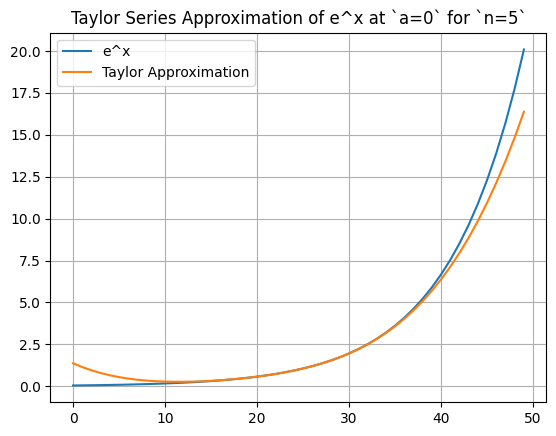

In [14]:
plt.plot(f_x)
plt.plot(taylor_approx)
plt.title(f"Taylor Series Approximation of e^x at `a=0` for `n=5`")
plt.legend(['e^x', 'Taylor Approximation'])
plt.grid()
plt.show() 

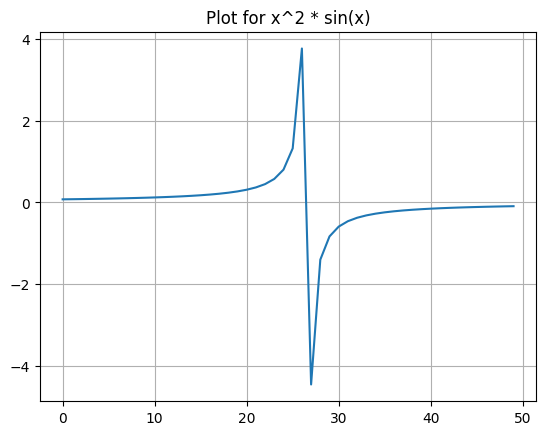

In [15]:
def some_complex_function(x: np.ndarray):  
    # f(x) = x^2 * sin(x) 
    # return (x ** 2) * (np.sin(x)) 
    return 1 / (1 - (4 * x))

f_x_some_complex_function = some_complex_function(x) 
plt.plot(f_x_some_complex_function)
plt.grid()
plt.title("Plot for x^2 * sin(x)")
plt.show() 


In [19]:
taylor_approximation_some_complex_function = taylor_series(some_complex_function, x, a=0, terms=20) 
taylor_approximation_some_complex_function

4.000160006412123


array([ 0.19915623,  0.22509862,  0.25442029,  0.28756145,  0.32501962,
        0.36735715,  0.41520963,  0.46929544,  0.53042654,  0.59952067,
        0.67761511,  0.76588223,  0.86564717,  0.97840762,  1.10585642,
        1.24990688,  1.41272157,  1.59674473,  1.80473902,  2.03982695,
        2.30553777,  2.60586046,  2.94530363,  3.32896316,  3.76259874,
        4.25272031,  4.80668584,  5.43281171,  6.14049766,  6.9403678 ,
        7.84443019,  8.86625706, 10.02118857, 11.32656315, 12.80197772,
       14.46958192, 16.35441068, 18.48475996, 20.89261164, 23.61411357,
       26.6901223 , 30.16681639, 34.0963897 , 38.53783494, 43.55782928,
       49.23173538, 55.64473272, 62.89309641, 71.08564248, 80.3453615 ])

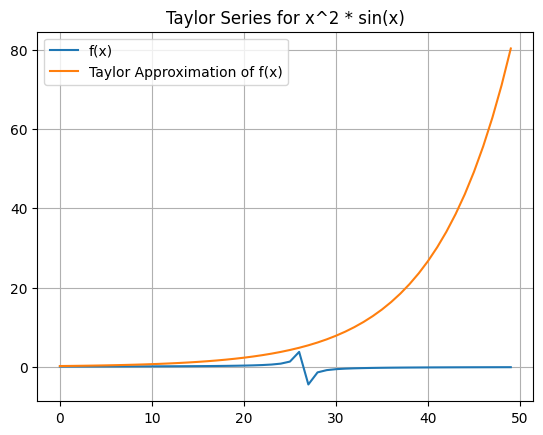

In [17]:
plt.plot(f_x_some_complex_function) 
plt.plot(taylor_approximation_some_complex_function)
plt.grid()
plt.title("Taylor Series for x^2 * sin(x)")
plt.legend(["f(x)", "Taylor Approximation of f(x)"])
plt.show() 